# **Energy Spectrum of a Charge Qubit**
*by Pelin Yıldırım <br> QWorld Summer Research Internship <br> QIntern 2020*

This notebook illustrates the energy spectrum of a charge qubit composed of a capacitor and tunnel junction as shown in the figure below. <br> ![Cooper Pair Box Circuit Schematics](https://pcqmia.dm.files.1drv.com/y4mxoSXAJF8c4n7C2vB9tD9REqPA9REfVkZXM7JDWdcuuFKVNOnPO4VodQ3q7AndIN-AzMDe41lSa5A1MGidxNzCnS_l1YnnK_XducQWF_NM4-E44Iuu6QjsqcHoCIcVSa7-e39JxOYm33KsxPdZe7HAWy9HaYBiaeHDuSyaPE0icOQ24g7jCkaj-KqWFM84WRKPf2BQkKkjgvwCIlMD8p7Lg?width=284&height=208&cropmode=none) 

Below, we study the factors which play a role in determining the spacing between energy levels based on the Hamiltonian.

## Introduction
Here, we reproduce the graphs corresponding to energy levels of Cooper Pair Box and observe the changes in the energy levels as we change parameters of the circuit. So that we will be able to have an idea about requirements for the quantumness of the circuit. The departure point of our calculations is [QuTip tutorials](http://qutip.org/tutorials.html) and the tutorial on [superconducting Josephson junction circuits](https://nbviewer.jupyter.org/github/jrjohansson/qutip-lectures/blob/master/Lecture-11-Charge-Qubits.ipynb#QuTiP-lecture:-Superconducting-Josephson-charge-qubits)!

### "Quantumness"
In Physics, quantumness of any object can be defined as the condition of being quantum in nature. In our case, quantumness is satisfied when we have distinguished energy levels for the circuit. 

### Necessary Python Libraries
Pyhton code given below is for activating necessary libraries used through the paper. 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# For the current version
!pip install --upgrade qutip 
from qutip import *

     |████████████████████████████████| 3.4MB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for qutip: filename=qutip-4.5.2-cp36-cp36m-linux_x86_64.whl size=12575568 sha256=ee98f7fffed49eae9ef77350f5d6034c2394ec004d8cb0fa4ab2b8369ad249e8
  Stored in directory: /root/.cache/pip/wheels/ae/90/e9/f26fdecfb6c0e9d9d6f5fa564d16d26ff2bdfd8ad6e7a8a28a
Successfully built qutip


## Hamiltonian of Cooper Pair Box



### Mathematical Representation
Hamiltonian of CPB is studied in various papers in literature is represented as follows [1]
$ H = \sum\limits_{N}4E_c(N-n_g)^2\left|N\right\rangle\left\langle N\right|-\frac{1}{2}E_j\sum\limits_{N}(\left|N+1\right\rangle\left\langle N\right|+\left|N\right\rangle\left\langle N+1\right|). $

Here $n_g = C_gV_g/2e$ is the normalized gate induced charge, $e$ is the electron charge, with
$n$ is an integer number of Cooper pairs and 
the gate voltage $V_g$ and gate capacitor $C_g$. $V_g$ is used to change the number of Cooper pairs in the box shown by the dotted lines on the figure above. The box is coupled to $V_g$ by the gate capacitor $C_g$. $E_j$ represents the Josephson coupling between the box and the reservoir, Cooper pairs can tunnel into or out of the box. The charging energy $E_c = \frac{e^2}{2C}$ is used to transfer the charges since $E_c$ exceeds thermal fluctuations $k_B T$. 

In order to plot the energy spectrum, i.e. available energy levels, for a system, we need to first find eigenvalues of its Hamiltonian. 




### Thermal Dependence 
Hamiltonian of the circuit depends on the temperature, the Hamiltonian written above is for $ T = 0 K $. So we have, $ H = \sum\limits_{N}4E_c(N-n_g)^2\left|N\right\rangle\left\langle N\right|e^{-\frac{E_n}{k_BT}}-\frac{1}{2}E_j\sum\limits_{N}(\left|N+1\right\rangle\left\langle N\right|+\left|N\right\rangle\left\langle N+1\right|)e^{-\frac{E_n}{k_BT}} $

### Python Codes
Here we represent the interpretation of the hamiltonian of this system in Python. Below, we use QuTip to evaluate these values. 


In [ ]:
def hamiltonian(Ec, Ej, N, ng):
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) + 0.5 * Ej * (np.diag(-np.ones(2*N), -1) + np.diag(-np.ones(2*N), 1))
    return Qobj(m)

It is important to note here that the variables of the Hamiltonian, $ E_c $, $ E_j $, $ N $, and $ n_g $, are also the *circuit parameters*.

In [ ]:
ng_vec = np.linspace(0, 1, 200)
ng_v = np.linspace(-4, 4, 200)

We then expand the code futher to plot the energy spectrum: 

In [ ]:
def plot_energies(ng_v, ng_vec, k, x, y, z):
    fig, axes = plt.subplots(2,2, figsize=(16,12), gridspec_kw={'wspace': 0.3})

    N = 10
    energies = np.array([hamiltonian(Ec, Ej, N, ng).eigenenergies() for ng in ng_v])
    for n in range(len(energies[0,:])):
        axes[0, 0].plot(ng_v, energies[:,n])
    axes[0, 0].set_ylim(k, x)
    axes[0, 0].set_xlabel(r'$n_g$', fontsize=14)
    axes[0, 0].set_ylabel(r'$E_n$', fontsize=14)
    axes[0, 0].set_title('Energy Spectrum')
    
    N = 1
    energies = np.array([hamiltonian(Ec, Ej, N, ng).eigenenergies() for ng in ng_vec])
    for n in range(len(energies[0,:])):
        axes[0, 1].plot(ng_vec, energies[:,n])
    axes[0, 1].set_ylim(-0.5, y)
    axes[0, 1].set_xlabel(r'$n_g$', fontsize=14)
    axes[0, 1].set_ylabel(r'$E_n$', fontsize=14)
    axes[0, 1].set_title('Two State Energy Spectrum')
    
    for n in range(len(energies[0,:])):
        axes[1, 0].plot(ng_vec, (energies[:,n]-energies[:,0])/(energies[:,1]-energies[:,0]))
    axes[1, 0].set_ylim(-0.1, z)
    axes[1, 0].set_xlabel(r'$n_g$', fontsize=14)
    axes[1, 0].set_ylabel(r'$(E_n-E_0)/(E_1-E_0)$', fontsize=14)
    axes[1, 0].set_title('Two State Normalized Energy Spectrum')

    for n in range(len(energies[0,:])):
        axes[1, 1].plot(ng_vec, (energies[:,n]-energies[:,n-1])/(energies[:,1]-energies[:,0]))
    axes[1, 1].set_ylim(-0.1, z)
    axes[1, 1].set_xlabel(r'$n_g$', fontsize=14)
    axes[1, 1].set_ylabel(r'$(E_n-E_{n-1})/(E_1-E_0)$', fontsize=14)
    axes[1, 1].set_title('Two State Normalized Energy Spectrum')
    return fig, axes

## Illustration of Energy Levels
In this section, there are 4 graphs for each ($ E_c $, $ E_j $) pair. First graph is the energy spectrum of the system for $ N = 10 $. Other three graphs are drawn for $ N = 1 $. The importance of $ N $ is that number of states of the system depends on it. There are $ 2N+1 $ available energy levels in each system. Second graph shows the two-state energy spectrum of the system, which is the important spectrum for our qubit since qubit will have only two available levels. Last two plots are normalized energy spectrums. Left one is frequently used but I haven't seen the right one was analyzed. I wanted to study this plot on the right because $ E_n-E_{n-1} $ is a crucial variable to prevent leakage to upper states of energy. $ \frac{E_n-E_{n-1}}{E_1-E_0} $ ratio should be different from $ 1 $ for any $ n \neq 1 $. 

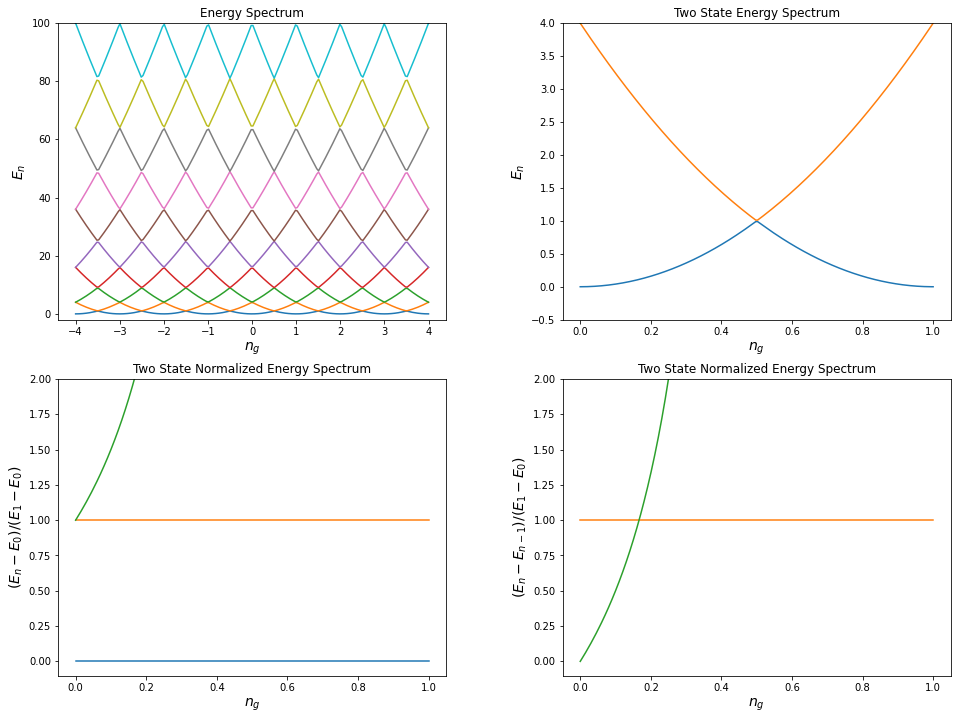

In [ ]:
Ec = 1.0
Ej = 0.01
plot_energies(ng_v, ng_vec, -2, 100, 4, 2);

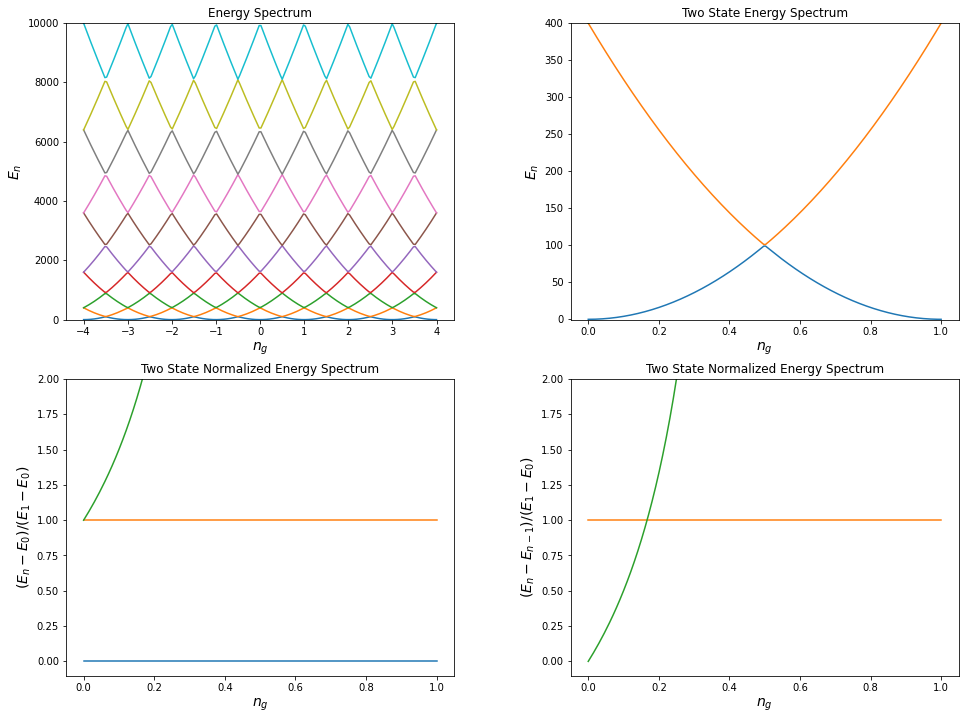

In [ ]:
Ec = 100.0
Ej = 1.0
plot_energies(ng_v, ng_vec, -2, 10000, 400, 2);

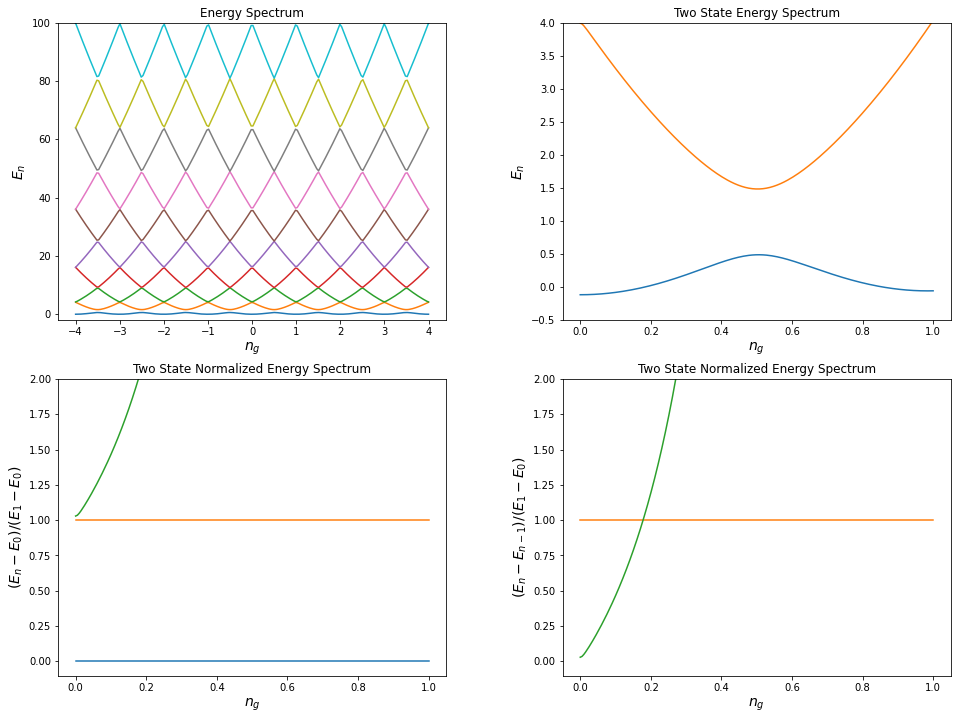

In [ ]:
Ec = 1.0
Ej = 1.0
plot_energies(ng_v, ng_vec, -2, 100, 4, 2);

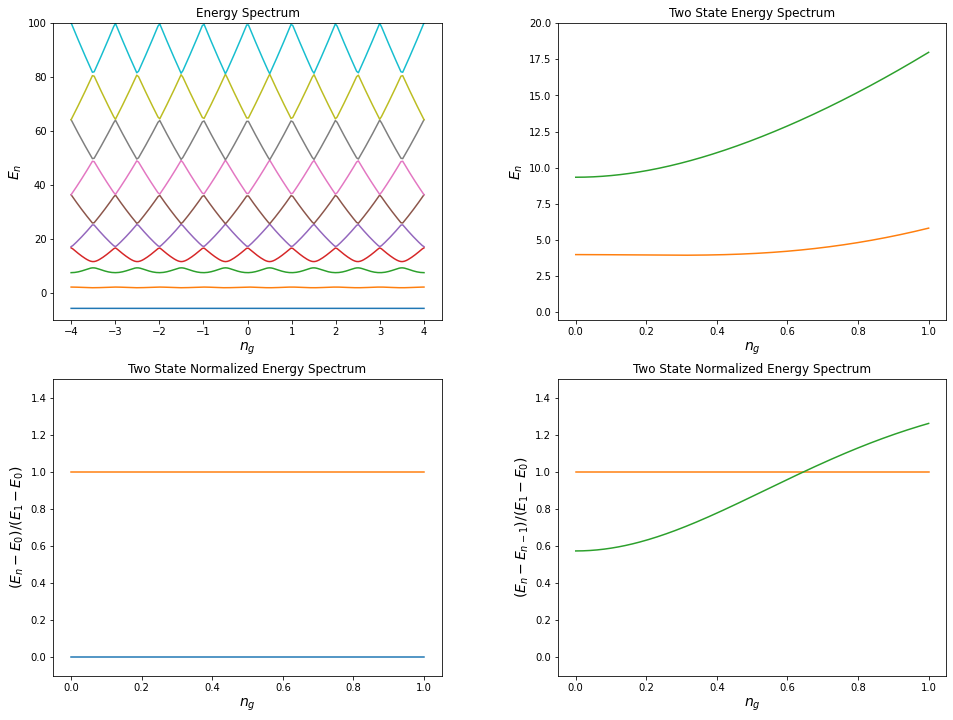

In [ ]:
Ec = 1.0
Ej = 10.0
plot_energies(ng_v, ng_vec, -10, 100, 20, 1.5);

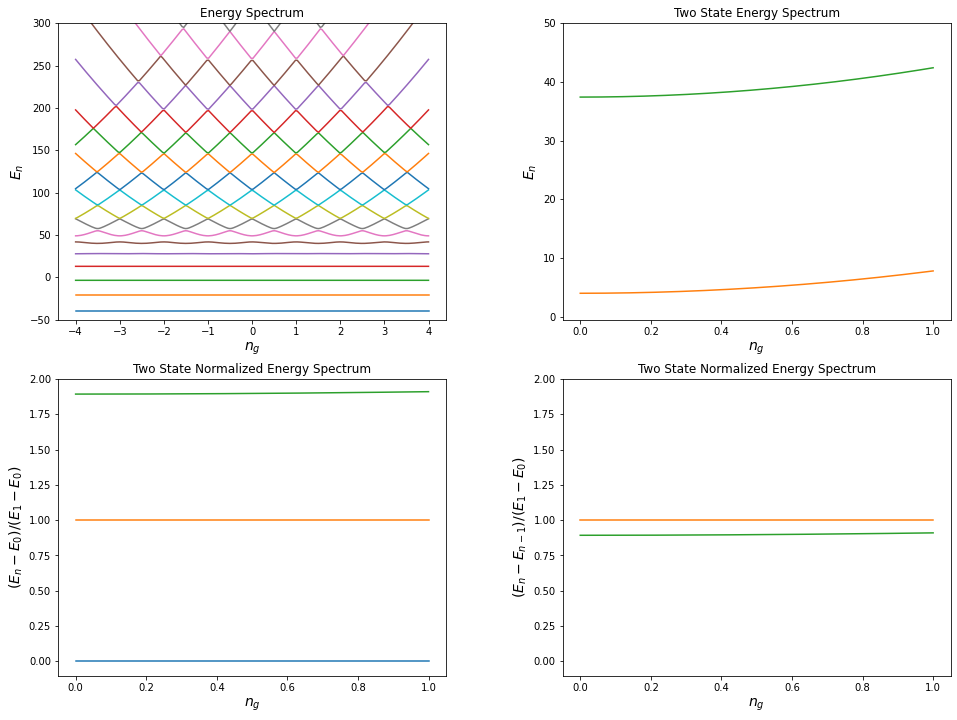

In [ ]:
Ec = 1.0
Ej = 50.0
plot_energies(ng_v, ng_vec, -50, 300, 50, 2);

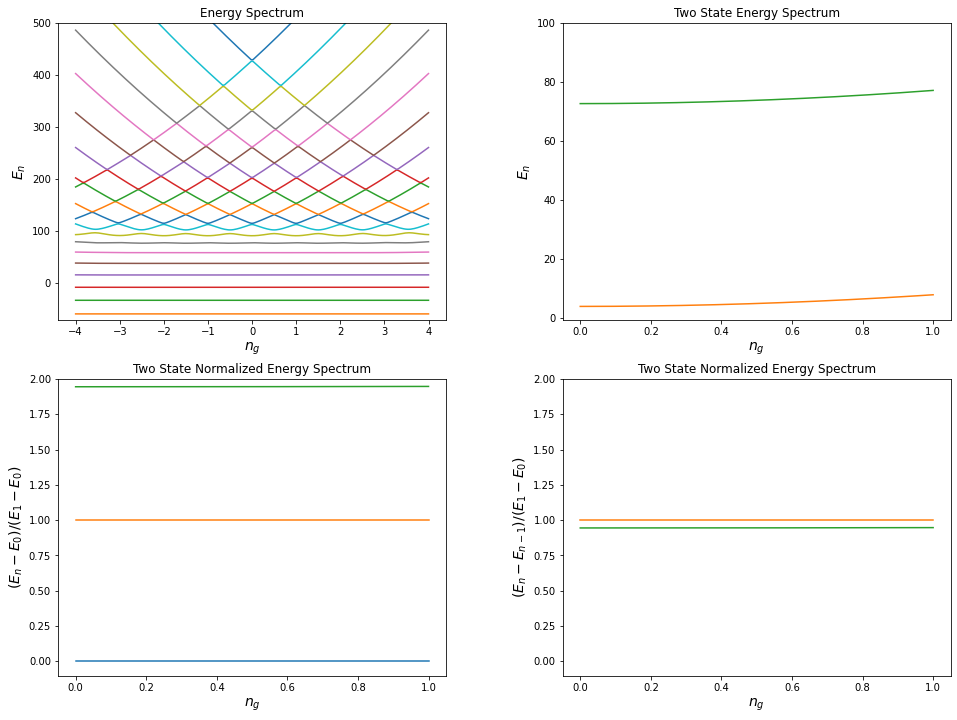

In [ ]:
Ec = 1.0
Ej = 100.0
plot_energies(ng_v, ng_vec, -70, 500, 100, 2);

## Hamiltonian and Temperature Dependence
This code below is written just out of interest to see how $ N $ changes the Hamiltonian. This Hamiltonian is a $ (2N+1)(2N+1) $ matrix. So when we change $ N $ value, we change the dimensions of the hamiltonian, therefore number of eigenvalues changes. Number of eigenvalues is actually the number of available states of the system, so for a two-leveled system $ N $ value is predetermined. 

In [ ]:
N = 2
Ec = 1
Ej = 0.01
ng = 1
h = hamiltonian(Ec, Ej, N, ng)
energies = np.array([h.eigenenergies()])
h, energies

(Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
 Qobj data =
 [[ 3.6e+01 -5.0e-03  0.0e+00  0.0e+00  0.0e+00]
  [-5.0e-03  1.6e+01 -5.0e-03  0.0e+00  0.0e+00]
  [ 0.0e+00 -5.0e-03  4.0e+00 -5.0e-03  0.0e+00]
  [ 0.0e+00  0.0e+00 -5.0e-03  0.0e+00 -5.0e-03]
  [ 0.0e+00  0.0e+00  0.0e+00 -5.0e-03  4.0e+00]],
 array([[-1.24999634e-05,  3.99999887e+00,  4.00001154e+00,
          1.60000008e+01,  3.60000012e+01]]))

**Notes and Questions**: <br> The problem with variable $ N $ is that when $ N = 1 $ we get 3 energy levels one of which is negative and when $ N = 0 $ we get 1 energy level because the Hamiltonian becomes a scalar value. As I could understood from the hamiltonian matrix, the link between $ N $ and number of states is that we get $ (2N+1) $ states for any integer $ N $. <br> One other point is the temperature dependence of hamiltonian. Is it something like this: $ H =\left [\sum\limits_{N}4E_c(N-n_g)^2\left|N\right\rangle\left\langle N\right| -\frac{1}{2}E_j\sum\limits_{N}(\left|N+1\right\rangle\left\langle N\right|+\left|N\right\rangle\left\langle N+1\right|) \right] $

Density matrix
$ \rho= \sum\limits_{N} p_N \rho_N$
where $p$ is the probability of that state being occupied. 
e.g.  for two states:
$ \rho= p_0 \rho_0+p_1 \rho_1$
$ \rho= p_{0} \left|E_{0} \right \rangle \left \langle E_{0} \right| + p_{1}\left|E_{1} \right \rangle \left \langle E_{1} \right| $
where 
$ p_N= \frac{e^{-\frac{E_n}{k_BT}}}{\sum e^{-\frac{E_n}{k_BT}}} $


## References

[1] Y. A. Pashkin, O. Astafiev, T. Yamamoto, Y. Nakamura, and J. Tsai, "Josephson charge qubits: a brief review," *Quantum information processing*, vol. 8, no. 2-3, pp. 55-80, 2009.